# <font color="green">Introduction to Pandas</font>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1920px-Pandas_logo.svg.png" style="text-align:center; height:150px">

Today we're going to start our journey through the Pandas library (created by Wes McKinney). The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

> ***"Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."*** (from the [Official Documentation Page](https://pandas.pydata.org/))

When we refer to working in Pandas, we're typically talking about working within a DataFrame, which is what we'll focus on today.

### Learning Objectives

At the end of this notebook you will be able to:

- explain why Pandas is important to Data Analysts
- create Pandas Dataframes from lists or a list of dictionaries
- load data from csv-files to DataFrames
- access data stored in DataFrames
- use the common features of a DataFrame
- save data from DataFrames in a file

## Installation

Install Pandas through a Terminal:

```bash
pip install pandas
```

In [ ]:
pip install pandas

## Pandas Import

In order to access everything in the Pandas library we need import it! 

In [1]:
import pandas as pd

When importing the entire pandas library, it’s a good practice to use the common alias `pd`. This convention makes our code more readable and consistent, especially when collaborating with others. So, instead of writing out `pandas` when calling functions from pandas library, we can simply use `pd` throughout our codebase.  

`pd.concat()`, `pd.pivot()`, `pd.Series()`  etc.

| Command                  | Description                      |
|--------------------------|----------------------------------|
| df = pd.DataFrame(...)  | DataFrame creation               |
| x = pd.Series(...)       | Series creation                  |
| df.shape                 | tuple with the number of rows and columns |
| df.head(n)               | shows n first rows               |
| df.columns               | list with column index names     |
| df.index                 | list with row index              |
| df.dtypes                | returns data type of each column in the dataframe |
| df.to_csv(file)          | write a table to disk            |
| pd.read_csv(file)        | read a table from disk           |


## Getting a DataFrame Object

DataFrames are the central data structure in pandas.

![dataframe.png](dataframe.png)

### Each DataFrame consists of

- multiple columns, each column is an object of type `pd.Series`
- a row index (row names)
- a column index (column names)

Columns of a DataFrame are objects of type `pd.Series`. Each series contains values of <u>**only one specific data type**</u>:

- `int64` for integer values
- `object` for string values
- `bool` for boolean values
- `float64` for float values

One more time: Each column in a pandas dataframe holds only **one specific data type**.

>#### There are two basic ways we can get a Pandas DataFrame object to work with. 
>1. The first is by using **data that is already in our Python program** and creating a dataframe with the DataFrame constructor. (`pd.DataFrame`)
>2. The second is by reading in **external data** through one of pandas' module's reading functions. (e.g. `pd.read_csv`)

# 2. How can we create a pandas dataframe ?

### Method 1: From a two-dimensional list

In [2]:
# create a list of lists
data = [['john', 25], ['diane', 30], ['jane', 24], ['lisa', 48]]
data
 

[['john', 25], ['diane', 30], ['jane', 24], ['lisa', 48]]

In [3]:
# Create the pandas DataFrame and give the column names using a list
df = pd.DataFrame(data, columns = ['name', 'age'])
df

,name,age
0,john,25
1,diane,30
2,jane,24
3,lisa,48


What do you expect our DataFrame to hold now?

In [4]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
df

,name,age
0,john,25
1,diane,30
2,jane,24
3,lisa,48


### Method 2: From a dictionary

In [6]:
# create a dictionary
data = {'name': ['john', 'diane', 'jane', 'lisa'],
        'age' : [25, 30, 24, 48]
       }

In [7]:
data

{'name': ['john', 'diane', 'jane', 'lisa'], 'age': [25, 30, 24, 48]}

In [8]:
df = pd.DataFrame(data)

In [9]:
# create the dataframe. each dictionary item becomes a column

df = pd.DataFrame(data)
df

,name,age
0,john,25
1,diane,30
2,jane,24
3,lisa,48


### method 3: using list of dictionaries

In [10]:
# create a list of dictionaries
data = [{'name': 'john', 'age': 25},
        {'name': 'diane', 'age': 30},
        {'name': 'jane', 'age': 24},
        {'name': 'lisa', 'age': 48}
        ]

# create the dataframe. every dictionary becoes a row

df = pd.DataFrame(data)
df

,name,age
0,john,25
1,diane,30
2,jane,24
3,lisa,48


# 3. Dataframe index and columns

In [11]:
# show dataframe
df

,name,age
0,john,25
1,diane,30
2,jane,24
3,lisa,48


In [12]:
# show the row index
df.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
# what is the type of the index?
type(df.index)

pandas.core.indexes.range.RangeIndex

In [14]:
# show column index
df.columns

Index(['name', 'age'], dtype='object')

In [15]:
# what is the type of the column index?
type(df.columns)

pandas.core.indexes.base.Index

In [16]:
# show contents of a column
df['name']

0     john
1    diane
2     jane
3     lisa
Name: name, dtype: object

In [17]:
# what type is a column in a dataframe?
type(df['name'])

pandas.core.series.Series

In [18]:
# what are the data types of the columns?
df.dtypes

name    object
age      int64
dtype: object

In [19]:
# what about the data type in a single column?
df['name'].dtype

dtype('O')

In [20]:
# inspecting column types with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


We see that the data was loaded in correctly. 

### Quick Statistics

To get a feeling of the data, it is highly recommended to get some statistics (better even, a summary of them). This helps us to evaluate the spread and central tendency of out data.

Of course also for this task, there is a pretty neat function already implemented in pandas:


In [21]:
df.describe()

,age
count,4.000000
mean,31.750000
std,11.146748
min,24.000000
25%,24.750000
50%,27.500000
75%,34.500000
max,48.000000


### Specify row index *labels* or column index *labels*

In [22]:
# when creating a dataframe, we can also explicitly specify our own index and column names

data = [[82_000_000, 1.9, "Europe"],
      [ 5_500_000, 1.8, "Europe"]]

df = pd.DataFrame(data,
                  columns=['population', 'fertility', 'continent'],
                  index=['Germany', 'Denmark'])

df

,population,fertility,continent
Germany,82000000,1.9,Europe
Denmark,5500000,1.8,Europe


# 4. Reading external files into dataframes

There are many ways that we can read external data into a Pandas DataFrame, and they will be called as a function that is available via the `pandas` module. 

The [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) will show you all of the ways that you could load external data into a DataFrame. Basically, there is a way to load in data stored in any format (CSV, JSON, SQL, Excel, HTML). All of these take some form of a `read_{data_type}` function, which means that we will call them as `pd.read_{data_type}`.

So, if we wanted to load data in from a CSV, we would simply use:

```python
df = pd.read_csv('my_data.csv')
```

**Note:** This assumes that we have the column names in the first row of your .csv.

If we don't have the column names in the first row of our .csv, we could read in the .csv with the following:

```python
df = pd.read_csv('my_data.csv', header=None)
```

**Note:** This by default assigns numbers as column names (starting with 0).

If we wanted to assign the column names as we read it in, we can pass in an additional `names` argument, where this `names` argument holds a list of the names we want to assign to the columns.

```python
df = pd.read_csv('my_data.csv', header=None, names=['col1', 'col2', ...., 'col12'])
```


## Looking at Our Data

Our data is available in the `data` folder inside this repo. It's called `penguins_simple.csv`. We will first read in the data, and then discuss what it's all about.

## Meet the Palmer penguins! 

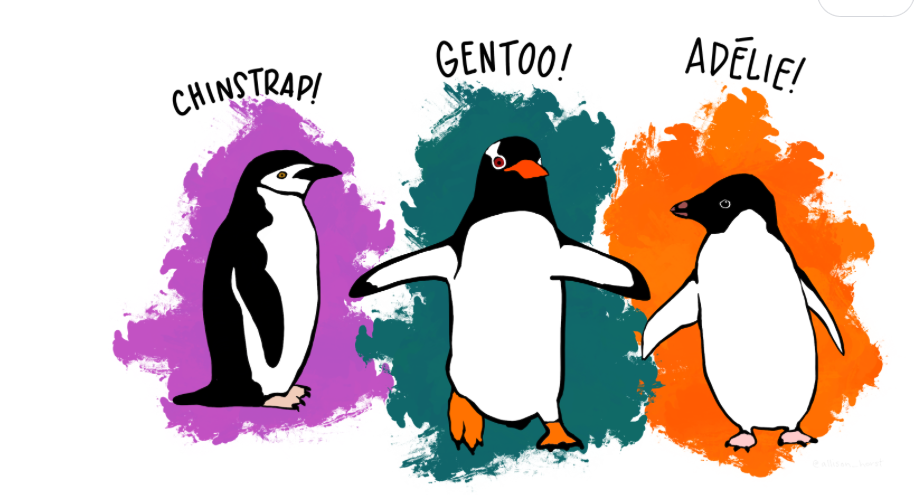



*Source: Data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.*



In [23]:
penguins = pd.read_csv('./data/penguins_simple.csv')

In [24]:
# look at the dataframe

penguins

,Species;Culmen Length (mm);Culmen Depth (mm);Flipper Length (mm);Body Mass (g);Sex
0,Adelie;39.1;18.7;181.0;3750.0;MALE
1,Adelie;39.5;17.4;186.0;3800.0;FEMALE
2,Adelie;40.3;18.0;195.0;3250.0;FEMALE
3,Adelie;36.7;19.3;193.0;3450.0;FEMALE
4,Adelie;39.3;20.6;190.0;3650.0;MALE
...,...
328,Gentoo;47.2;13.7;214.0;4925.0;FEMALE
329,Gentoo;46.8;14.3;215.0;4850.0;FEMALE
330,Gentoo;50.4;15.7;222.0;5750.0;MALE
331,Gentoo;45.2;14.8;212.0;5200.0;FEMALE


In [25]:
penguins = pd.read_csv('./data/penguins_simple.csv', sep=";")

***sep=";"*** specifies the delimiter used in the CSV (Comma-Separated Values) file being read. The sep parameter in the pd.read_csv function of the pandas library defines the character or sequence of characters that separates columns within the file.

In [26]:
penguins

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


**Column Description:**

| Name                 | Description                              |
|----------------------|------------------------------------------|
| Species              | Penguin species (Chinstrap, Adélie, or Gentoo) |
| Culmen Length (mm)   | Culmen length (mm)                       |
| Culmen Depth (mm)    | Culmen depth (mm)                        |
| Flipper Length (mm)  | Flipper length (mm)                      |
| Body Mass (g)        | Body mass (grams)                        |
| Sex                  | Penguin sex                              |


In [27]:
# we can save a dataframe into a csv file

penguins.to_csv("./data/penguins_simple_copy.csv", index=False)

In [28]:
penguins.to_excel("./data/penguins_simple_copy.xlsx", index=False)

In [29]:
## we can also read other types of files such as excel files

# if students get an error it is probably "xlrd" package missing
# pip install xlrd

pingu = pd.read_excel("./data/penguins_simple_copy.xlsx")

pingu

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181,3750,MALE
1,Adelie,39.5,17.4,186,3800,FEMALE
2,Adelie,40.3,18.0,195,3250,FEMALE
3,Adelie,36.7,19.3,193,3450,FEMALE
4,Adelie,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214,4925,FEMALE
329,Gentoo,46.8,14.3,215,4850,FEMALE
330,Gentoo,50.4,15.7,222,5750,MALE
331,Gentoo,45.2,14.8,212,5200,FEMALE


### Reading and Writing DataFrames with Pandas

Pandas is a powerful and flexible data analysis/manipulation library available in Python, which provides numerous functions to quickly read data from, and write data to, various file formats. When working with tabular data, pandas primarily uses a DataFrame object, which is a two-dimensional labeled data structure with columns that can be of different types.

#### Reading Data into DataFrames

Pandas provides a variety of functions to read in data stored in different formats. Below are some of the most common methods used for reading data:

- **CSV Files:** 
  - Function: `pd.read_csv()`
  - Usage: Reads data from a comma-separated values (CSV) file into a DataFrame. CSV is one of the most common file formats for tabular data due to its simplicity and wide adoption.
  
- **Excel Files:** 
  - Function: `pd.read_excel()`
  - Usage: Imports data from an Excel file. This is particularly useful when working with datasets that are initially created and stored using Microsoft Excel.
  
- **JSON Files:** 
  - Function: `pd.read_json()`
  - Usage: Parses a JSON string or file, converting JSON objects into a pandas DataFrame. JSON is commonly used for storing and exchanging data on the web where attribute-value or key-value pairs are prevalent.

Each of these functions comes with a host of parameters that allow for customization and handling of specific nuances in the data format (e.g., custom delimiters, specifying header rows, handling missing values, etc.).

#### Writing DataFrames to Files

To save your data for future use, share with others, or for further analysis in other software, pandas also provides several methods to write DataFrames back into various formats:

- **CSV Files:** 
  - Method: `df.to_csv()`
  - Usage: Exports the DataFrame `df` to a CSV file. This method is straightforward and works great for flat data structures.

- **Excel Files:** 
  - Method: `df.to_excel()`
  - Usage: Saves the DataFrame `df` to an Excel file, which can then be opened in Excel or other spreadsheet programs. This is particularly helpful when you need to share data with users who prefer Excel for data analysis or visualization.

- **JSON Files:** 
  - Method: `df.to_json()`
  - Usage: Writes the DataFrame `df` to a JSON file. This can be useful when interacting with web applications or services that consume JSON.

These methods also offer additional parameters to fine-tune the output, such as the ability to specify the encoding, whether to include the index in the output, and how to handle missing data.
